In [1]:
! pip3 install snscrape

In [6]:
! snscrape twitter-hashtag ml-zoomcamp > twitter-ml-zoomcamp

2023-01-03 18:36:49.066  INFO  snscrape.modules.twitter  Retrieving guest token from search page
2023-01-03 18:36:49.068  INFO  snscrape.base  Retrieving https://twitter.com/search?f=live&lang=en&q=%23ml-zoomcamp&src=spelling_expansion_revert_click
2023-01-03 18:36:49.566  INFO  snscrape.modules.twitter  Retrieving scroll page None
2023-01-03 18:36:49.568  INFO  snscrape.base  Retrieving https://api.twitter.com/2/search/adaptive.json?include_profile_interstitial_type=1&include_blocking=1&include_blocked_by=1&include_followed_by=1&include_want_retweets=1&include_mute_edge=1&include_can_dm=1&include_can_media_tag=1&skip_status=1&cards_platform=Web-12&include_cards=1&include_composer_source=true&include_ext_alt_text=true&include_reply_count=1&tweet_mode=extended&include_entities=true&include_user_entities=true&include_ext_media_color=true&include_ext_media_availability=true&send_error_codes=true&simple_quoted_tweets=true&q=%23ml-zoomcamp&tweet_search_mode=live&count=100&query_source=spell

In [12]:
with open("twitter-ml-zoomcamp") as infile:
    data = infile.read()

data = data.split("\n")
print(len(data), data[:3])

322 ['https://twitter.com/emeka_david/status/1606272427394101249', 'https://twitter.com/peco602/status/1605924865743142915', 'https://twitter.com/brut0zealot/status/1605920815651905537']


In [275]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [208]:
# https://github.com/JustAnotherArchivist/snscrape/issues/438

tweets_list = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterHashtagScraper('mlzoomcamp').get_items()):
    tweets_list.append([tweet.date, tweet.id, tweet.content, tweet.username])

# Creating a dataframe from the tweets list above 
df = pd.DataFrame(tweets_list, columns=['date', 'id', 'content', 'username'])

In [209]:
df.to_json("tweets.json")

In [219]:
df["date"] = pd.to_datetime(df.date).dt.date
# df.set_index('date', inplace=True)
df.drop("username", axis=1)

,date,id,content
0,2023-01-03,1610369064928702464,Evaluating projects #mlzoomcamp\nCapstone #3 -...
1,2023-01-03,1610300826794295298,"#MLZoomcamp\nFinally, the 3rd evaluation\n\nA ..."
2,2023-01-03,1610186664386633731,Having done with reviewing 3 peer-projects fro...
3,2023-01-02,1609975742451916800,#mlzoomcamp capstone review no.3: also it look...
4,2023-01-02,1609975621496590339,#mlzoomcamp capstone review no.3: extremely co...
...,...,...,...
2121,2021-09-06,1434989844162248704,Today is the first day of #MLZoomcamp by @Al_G...
2122,2021-09-06,1434969017802952714,Day 1 of #MLZoomcamp from @Al_Grigor.\nWatched...
2123,2021-09-06,1434935373730222082,@Al_Grigor #MLZoomcamp?
2124,2021-09-06,1434913871098167299,Day 1 of #120 days of #MLzoomcamp by @AI_Grig...


In [243]:
cohort21 = df[df.date < pd.Timestamp('2022-02-01')]
between = df[(df.date >= pd.Timestamp('2022-02-01')) & (df.date < pd.Timestamp('2022-09-01'))]
cohort22 = df[df.date >= pd.Timestamp('2022-09-01')]
print(cohort21.shape, between.shape, cohort22.shape)

(646, 4) (15, 4) (1465, 4)


/opt/conda/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


In [244]:
print("cohort 2021 : first tweet", cohort21.date.min().strftime("%y-%m-%d"), "; last tweet", cohort21.date.max().strftime("%y-%m-%d"))
print("cohort 2022 : first tweet", cohort22.date.min().strftime("%y-%m-%d"), "; last tweet", cohort22.date.max().strftime("%y-%m-%d"))

cohort 2021 : first tweet 21-09-06 ; last tweet 22-01-30
cohort 2022 : first tweet 22-09-05 ; last tweet 23-01-03


# "#mlzoomcamp" Tweets per Day

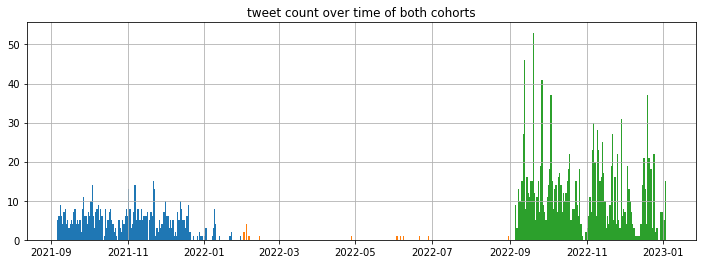

In [246]:
plt.figure(figsize=(12,4))
plt.title("tweet count over time of both cohorts")
cohort21.date.hist(bins=30*5)
between.date.hist(bins=30*7)
cohort22.date.hist(bins=30*4)
plt.show()

# Tweet Count per User

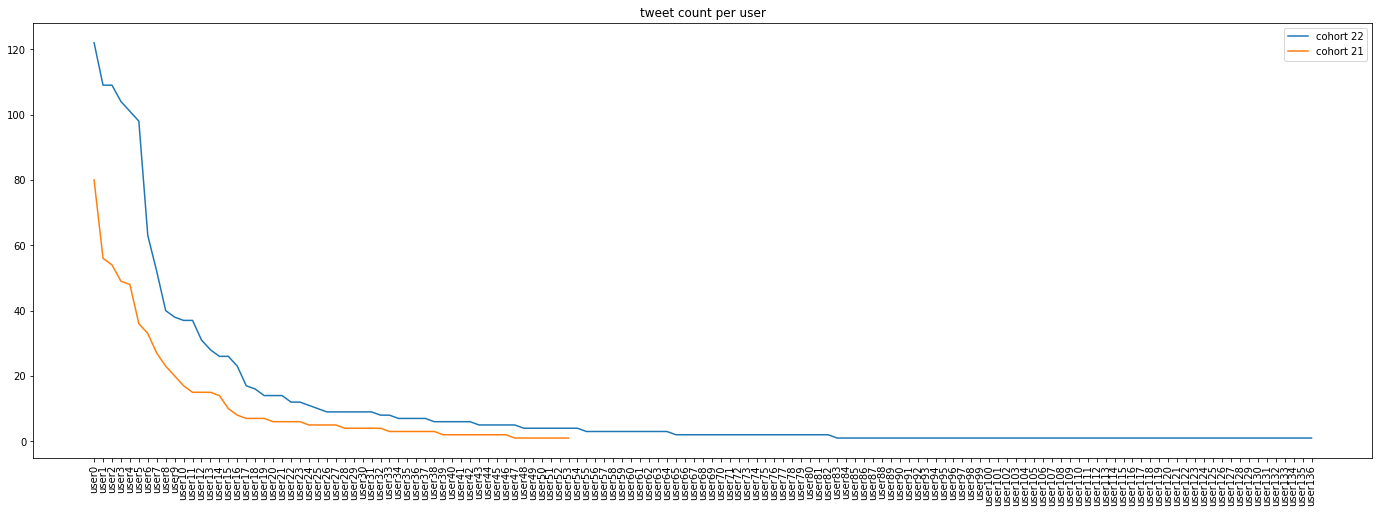

In [250]:
plt.figure(figsize=(24,8))
plt.title("tweet count per user")
tweet_count_per_user22 = list(cohort22.username.value_counts())
tweet_count_per_user21 = list(cohort21.username.value_counts())
plt.plot([f"user{i}" for i in range(len(tweet_count_per_user22))], tweet_count_per_user22)
plt.plot([f"user{i}" for i in range(len(tweet_count_per_user21))], tweet_count_per_user21)
plt.xticks(rotation='vertical')
plt.legend(["cohort 22", "cohort 21"], loc="upper right")
plt.show()

In [259]:
leaderboard21 = pd.read_html("https://docs.google.com/spreadsheets/d/e/2PACX-1vQHj_Y138-aWhkPvwZFPIDl8aoJmtNjaUQ7ZaL-3BFhiuqQZgUpHY3yjbsvF_nsyF0WftTorji4ovCb/pubhtml#")[-1]
leaderboard21.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,1.0,email,homework-1,homework-2,homework-3,homework-4,homework-5,homework-6,midterm-project,homework-8,homework-9,homework-10,capstone-project,project-3,article,total
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,7b42d7082e4bd1f07c8f3511633f9ee0e9a67069,8,10,10,13,12,13,44,13,13,13,45,0,27,221
3,3.0,2dbe7972ee4a8139de8bda124fdfde718930669a,10,7,10,12,13,13,38,13,13,13,49,0,21,212
4,4.0,e6aee1f205bf5bd495690d7a0ef213a2d5812720,12,11,10,11,10,13,39,13,13,12,38,0,20,202


In [253]:
leaderboard22 = pd.read_html("https://docs.google.com/spreadsheets/d/e/2PACX-1vQzLGpva63gb2rIilFnpZMRSb-buyr5oGh8jmDtIb8DANo4n6hDalra_WRCl4EZwO1JvaC4UIS62n5h/pubhtml#")[-1]
leaderboard22.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1.0,email,hw-01,hw-02,hw-03,hw-04,hw-05,hw-06,hw-07,project-01,hw-08,hw-09,hw-10,total
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,51d367b74ba52590d37a8bc935a6bc800efa2a21,15,14,14,14,14,14,14,45,14,14,15,187
3,3.0,74850e9d79cd340cd1a26839d14906c826ffb752,14,14,13,14,13,14,14,45,14,13,15,183
4,4.0,fbd7c94e3b9ad8a87aeac6839d98fb1de8e53a6e,9,14,13,14,14,14,14,45,14,14,15,180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714,714.0,954a1d3172b8bb9d886a885b43ab0cd25997ef5e,0,0,0,0,0,0,0,0,0,0,0,0
715,715.0,753f33e7197b4493d127adf9922377253cc51bbe,0,0,0,0,0,0,0,0,0,0,0,0
716,716.0,63ce6c3124f9580fe53f80ea1fd6c5d2d241f890,0,0,0,0,0,0,0,0,0,0,0,0
717,717.0,2458d9864e7adcfc6bd42983891819feee52641f,0,0,0,0,0,0,0,0,0,0,0,0


In [279]:
# leaderboard21 = leaderboard21.drop(["Unnamed: 0", "Unnamed: 1"], axis=1)
# leaderboard21.columns = list(leaderboard21.loc[0])
# leaderboard21 = leaderboard21.loc[2:]
# leaderboard21 = leaderboard21.astype(np.int64)
leaderboard21

,homework-1,homework-2,homework-3,homework-4,homework-5,homework-6,midterm-project,homework-8,homework-9,homework-10,capstone-project,project-3,article,total
2,8,10,10,13,12,13,44,13,13,13,45,0,27,221
3,10,7,10,12,13,13,38,13,13,13,49,0,21,212
4,12,11,10,11,10,13,39,13,13,12,38,0,20,202
5,8,9,9,11,10,12,39,13,13,0,45,0,0,169
6,14,12,13,12,13,13,36,13,9,0,0,22,0,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,0,0,0,0,0,0,0,0,0,0,0,0,0,0
439,0,0,0,0,0,0,0,0,0,0,0,0,0,0
440,0,0,0,0,0,0,0,0,0,0,0,0,0,0
441,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [280]:
# leaderboard22 = leaderboard22.drop(["Unnamed: 0", "Unnamed: 1"], axis=1)
# leaderboard22.columns = list(leaderboard22.loc[0])
# leaderboard22 = leaderboard22.loc[2:]
leaderboard22 = leaderboard22.astype(np.int64)
leaderboard22

,hw-01,hw-02,hw-03,hw-04,hw-05,hw-06,hw-07,project-01,hw-08,hw-09,hw-10,total
2,15,14,14,14,14,14,14,45,14,14,15,187
3,14,14,13,14,13,14,14,45,14,13,15,183
4,9,14,13,14,14,14,14,45,14,14,15,180
5,10,11,13,13,14,13,13,44,14,14,15,174
6,10,8,14,14,14,14,14,43,13,14,15,173
...,...,...,...,...,...,...,...,...,...,...,...,...
714,0,0,0,0,0,0,0,0,0,0,0,0
715,0,0,0,0,0,0,0,0,0,0,0,0
716,0,0,0,0,0,0,0,0,0,0,0,0
717,0,0,0,0,0,0,0,0,0,0,0,0


In [312]:
leaderboard21.columns

Index(['homework-1', 'homework-2', 'homework-3', 'homework-4', 'homework-5',
       'homework-6', 'midterm-project', 'homework-8', 'homework-9',
       'homework-10', 'capstone-project', 'project-3', 'article', 'total'],
      dtype='object')

In [311]:
leaderboard22.columns

Index(['hw-01', 'hw-02', 'hw-03', 'hw-04', 'hw-05', 'hw-06', 'hw-07',
       'project-01', 'hw-08', 'hw-09', 'hw-10', 'total'],
      dtype='object')

# Assignment Scores & Student Retention

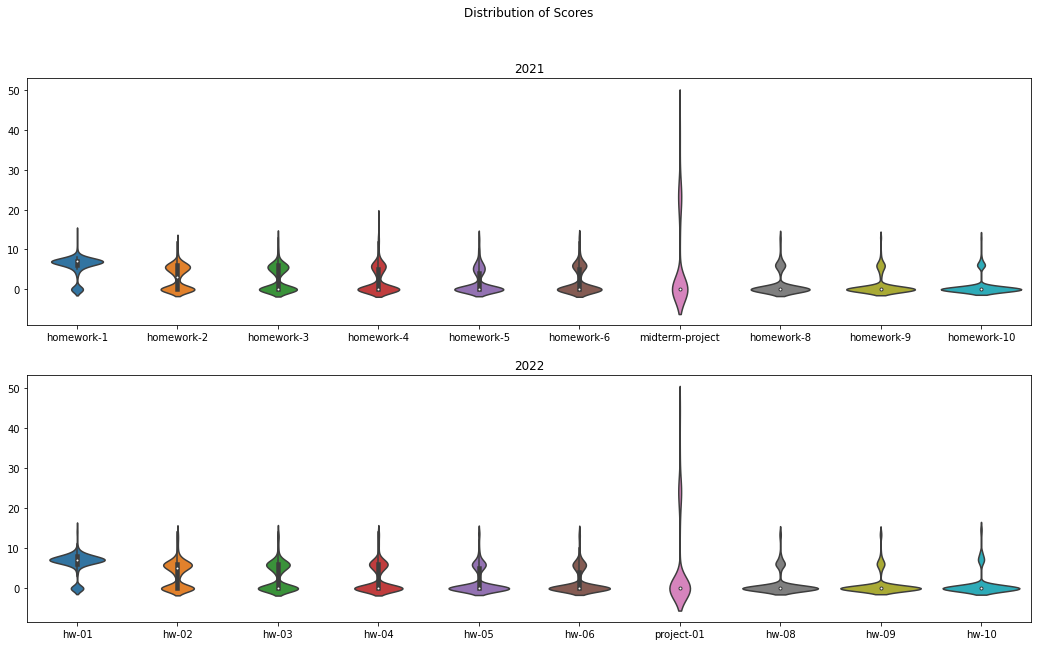

In [330]:
import seaborn as sns

fig, axs = plt.subplots(2, figsize=(18,10))
fig.suptitle('        Distribution of Scores')
sns.violinplot(ax=axs[0], data=leaderboard21[['homework-1', 'homework-2', 'homework-3', 'homework-4', 'homework-5', 'homework-6', 'midterm-project', 'homework-8', 'homework-9', 'homework-10']])
axs[0].set_title("2021")
sns.violinplot(ax=axs[1], data=leaderboard22[['hw-01', 'hw-02', 'hw-03', 'hw-04', 'hw-05', 'hw-06', 'project-01', 'hw-08', 'hw-09', 'hw-10']])
axs[1].set_title("2022")
plt.show()

# Tweet Analysis

In [333]:
# https://pub.towardsai.net/scraping-tweets-using-snscrape-and-building-sentiment-classifier-13811dadd11d
# https://huggingface.co/docs/transformers/main_classes/pipelines

! pip install transformers

In [334]:
from transformers import pipeline

sentiment_classifier = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

2023-01-03 22:34:18.683341: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Downloading:   0%|          | 0.00/255M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

In [343]:
tweet = list(cohort21.content)[100]
print(tweet)
print()
print(sentiment_classifier(tweet))

#mlzoomcamp by @Al_Grigor of @DataTalksClub 

Working on the Capstone project - time series data for regression problem. Learning a lot of new things with regards to using ML for time series data.
Trying new feature creation, scaling, using cyclical encoding (sine/cosine)

[{'label': 'NEGATIVE', 'score': 0.9801472425460815}]


In [352]:
# token_classifier = pipeline(model="Jean-Baptiste/camembert-ner", aggregation_strategy="simple")
tokens = token_classifier(tweet)
tokens

[{'entity_group': 'PER',
  'score': 0.97475404,
  'word': '@Al_Grigor',
  'start': 14,
  'end': 25},
 {'entity_group': 'ORG',
  'score': 0.94410866,
  'word': '@DataTalksClub',
  'start': 28,
  'end': 43},
 {'entity_group': 'MISC',
  'score': 0.9722593,
  'word': 'Capstone',
  'start': 60,
  'end': 69},
 {'entity_group': 'MISC',
  'score': 0.99623275,
  'word': 'ML',
  'start': 171,
  'end': 174}]

In [349]:
# summarizer = pipeline("summarization")
summary = summarizer(tweet, min_length=5, max_length=20)
summary

[{'summary_text': ' Working on the Capstone project - time series data for regression problem . Learning a lot'}]

In [355]:
token_classifier(summary[0]["summary_text"])

[{'entity_group': 'MISC',
  'score': 0.58796203,
  'word': 'Capstone',
  'start': 15,
  'end': 24}]

In [347]:
oracle = pipeline(model="facebook/bart-large-mnli")

Downloading:   0%|          | 0.00/4.83k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.13k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.52G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

In [348]:
oracle(
    tweet,
    candidate_labels=["urgent", "not urgent", "phone", "tablet", "computer"],
)

{'sequence': '#mlzoomcamp by @Al_Grigor of @DataTalksClub \n\nWorking on the Capstone project - time series data for regression problem. Learning a lot of new things with regards to using ML for time series data.\nTrying new feature creation, scaling, using cyclical encoding (sine/cosine)',
 'labels': ['computer', 'tablet', 'urgent', 'phone', 'not urgent'],
 'scores': [0.5646059513092041,
  0.15198087692260742,
  0.13363410532474518,
  0.0825992003083229,
  0.06717992573976517]}

In [ ]:
POS Tagging tweet